In [1]:
from pylab import *

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston_dataset = load_boston()

In [4]:
import pandas as pd

In [5]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


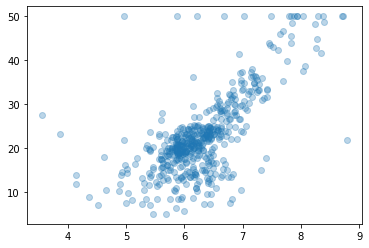

In [6]:
scatter(boston['RM'], boston['MEDV'], alpha=0.3)
show()

In [7]:
X = array(boston['RM'])
Y = array(boston['MEDV'])

In [8]:
import torch

In [9]:
print(X.shape, Y.shape)

(506,) (506,)


In [10]:
X = torch.Tensor(X.reshape(506, 1))
Y = torch.Tensor(Y.reshape(506, 1))

In [11]:
print(X.shape, Y.shape)

torch.Size([506, 1]) torch.Size([506, 1])


In [12]:
class LinearRegretion(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        
        self.F = torch.nn.Linear(input_dim, 1)
        
    def forward(self, x):
        x = self.F(x)
        
        return x

In [13]:
from torch.utils.tensorboard import SummaryWriter

In [14]:
tb = SummaryWriter()

model = LinearRegretion(1)

tb.add_graph(model, X)
tb.close()

In [15]:
def train(model, x, y, epochs=1, lr=0.01):
        tb = SummaryWriter()
        optimizer = torch.optim.SGD(model.parameters(), lr=lr)
        loss_fn = torch.nn.MSELoss()
        
        model.train()
        
        for epoch in range(0, epochs):
            
            preds = model(x)
            loss = loss_fn(preds, y)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total_loss = loss.item()
            
            tb.add_scalar('Loss', total_loss, epoch)
            
            tb.add_histogram('F.bias', model.F.bias, epoch)
            tb.add_histogram('F.weight', model.F.weight, epoch)
            tb.add_histogram('F.weight.grad', model.F.weight.grad, epoch)
            
        tb.close()            

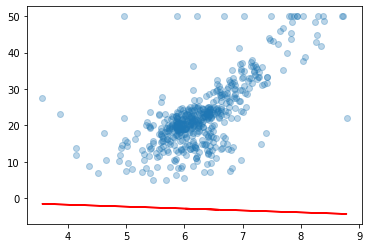

In [16]:
y_ = model(X)
y_ = y_.detach()
scatter(X, Y, alpha=0.3)
plot(X, y_, c='red')
show()

In [17]:
train(model, X, Y, epochs=1000, lr=0.003)

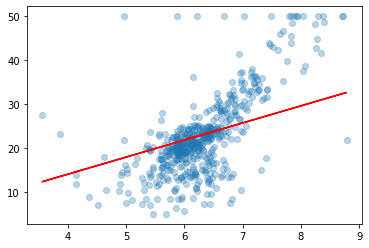

In [18]:
y_ = model(X)
y_ = y_.detach()
scatter(X, Y, alpha=0.3)
plot(X, y_, c='red')
show()

In [19]:
%load_ext tensorboard
%tensorboard --logdir runs